## Setup

In [1]:
'''Locate the working directory'''
if __name__ == '__main__':    
    import sys
    from _path import workdir
    sys.path.append(workdir)
    print(sys.path[-1])

c:\Users\vince\OneDrive - The Chinese University of Hong Kong\python projects\py stellar perturbations\test\modes_aniso\..\..


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.static.tov import solve_tov
from src.eos.poly import eos_poly
from src.eos.table import eos_table
from src.eos.anisotropy.H2 import sigma_H2
from src.perturb.pulsation.gr_aniso.evp import evp_LD_aniso
from src.perturb.pulsation.gr_aniso.ivp import ivp_LD_aniso

## Parameters

In [3]:
rho0 = 7.455e14
pcut = 1.e20
eos_file = 'eos_D12.txt'

In [4]:
rho_list, p_list = np.loadtxt('eos_D12.txt'\
                    ,skiprows=0, usecols=(2,3),unpack=True)

## Compute background solution

In [5]:
# eos = eos_poly(k = 1.e35/(1.e15)**2, n = 1.)
eos = eos_table(rho_list, p_list)
sigma = sigma_H2(beta = 0.)

tov=solve_tov(eos, sigma= sigma)
tov.ivp(p0=eos.p(rho0),pcut=pcut)

## Scanning $A_\text{in}$

In [6]:
evp = evp_LD_aniso(ell = 2., bsol = tov)
evp.ode_method = 'RK45'
evp.atol_factor, evp.rtol = 1.e-8, 1.e-6
evp.z_atol_factor, evp.z_rtol = 1.e-14, 1.e-8
# evp.scan_Ain(flist = np.linspace(1500,1600,20))
evp.scan_Ain(flist = np.linspace(4320.,4350.,20))

In [7]:
evp.scan_Ain(flist = np.linspace(4334.,4337.,10),add=True)

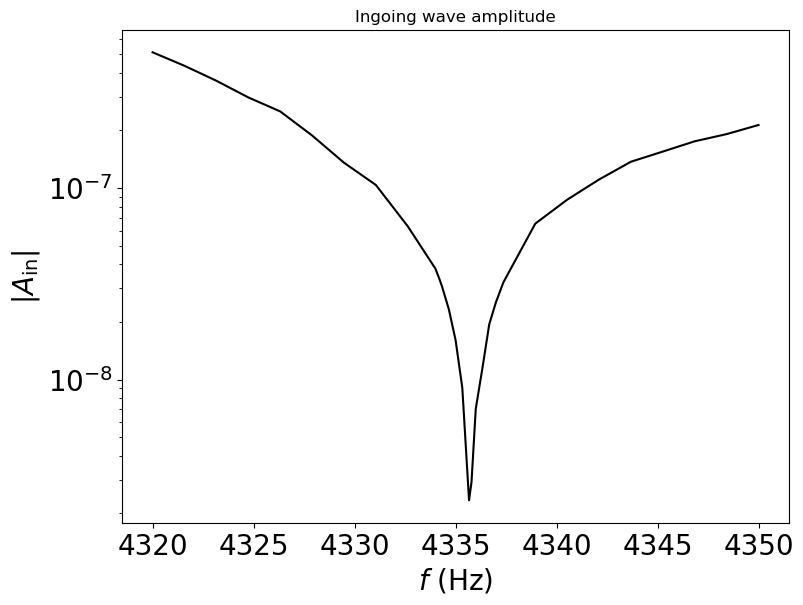

In [8]:
evp.plot_Ain()

## Solve for modes

In [9]:
evp.muller_print = True
# freq = evp.solve_mode(f0 = 1570., fw = 10.)
freq = evp.solve_mode(f0 = 4336., fw = 0.2)
print(freq)

4.3360e+03 + -1.8549e-02 i, |f1| = 7.0461e-09, error = 4.8713e-05
4.3360e+03 + 1.5595e-01 i, |f1| = 3.1178e-09, error = 4.0465e-05
4.3359e+03 + 6.0211e-03 i, |f1| = 8.9033e-09, error = 3.5778e-05
4.3359e+03 + -1.3821e-02 i, |f1| = 6.9135e-09, error = 1.4002e-05
4.3358e+03 + 2.1856e-02 i, |f1| = 6.8784e-09, error = 1.9994e-05
4.3358e+03 + 6.7034e-02 i, |f1| = 5.6609e-09, error = 1.0916e-05
4.3357e+03 + 1.9021e-02 i, |f1| = 4.6307e-09, error = 1.3819e-05
4.3357e+03 + 3.8992e-03 i, |f1| = 2.8881e-09, error = 6.4646e-06
4.3357e+03 + 1.5699e-02 i, |f1| = 2.5418e-09, error = 2.7313e-06
4.3357e+03 + 2.9221e-02 i, |f1| = 1.9409e-09, error = 3.6091e-06
4.3357e+03 + 2.7707e-02 i, |f1| = 1.4159e-09, error = 2.3544e-06
4.3357e+03 + 2.9638e-02 i, |f1| = 1.2240e-09, error = 1.4768e-06
4.3357e+03 + 3.2722e-02 i, |f1| = 9.1623e-10, error = 1.1095e-06
4.3357e+03 + 3.2844e-02 i, |f1| = 1.7904e-09, error = 2.9367e-07
4.3357e+03 + 3.2150e-02 i, |f1| = 1.6608e-09, error = 6.7307e-07
4.3357e+03 + 3.2757e-02

## Plot

In [10]:
# plt.figure(figsize=(8.6,6.4), dpi= 100)
# plt.plot(r_list/1.e5, m_list/msun, 'k-')
# plt.title(r'M-R curve (Polytrope, n = 1)')
# plt.xlabel(r'$R$ (km)',fontsize=15)
# plt.ylabel(r'$M (M_\odot)$',fontsize=15)
# plt.show()
# plt.close()